# Deep learning and AI methods
## Session 4: Prediction of fuel efficiency
* Instructor: [Krzysztof Podgorski](https://krys.neocities.org),  [Statistics, Lund University, LUSEM](https://www.stat.lu.se/)
* For more information visit the [CANVAS class website](https://canvas.education.lu.se/courses/1712).

In this session we learn how to use *TensorFlow* and *Keras* for construction a nn solving a regression problem based on the data to predict fuel efficiency. We also learn several features of `DataFrame` class of provided by the library `pandas`.

In a *regression* problem, we aim to predict the output of a continuous value, like a price or a probability. Contrast this with a *classification* problem, where we aim to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This notebook uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. To do this, we'll provide the model with a description of many automobiles from that time period. This description includes attributes like: cylinders, displacement, horsepower, and weight.

This example uses the `tf.keras` API, see [this guide](https://www.tensorflow.org/guide/keras) for details.

In [1]:
# Use seaborn for pairplot
# !pip install -q seaborn

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.15.0


## Project 1 Initial exploration and preparation of the data set for regression
### The Auto MPG dataset

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg).



### Get the data
First download the dataset.

In [3]:
# Set path to data
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/Users/Sara/.keras/datasets/auto-mpg.data'

Import it using pandas into the `DataFrame` structure. Read more about `DataFrame` in [Pandas Data Frame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Below you will also learn more about the topic. 

In [4]:
# Specify column names
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

# Load data
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

# Create copy to work on (good practice)
dataset = raw_dataset.copy()

# Inspect last five rows
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
# Experiment: Inspect top five rows
dataset.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [6]:
# Experiment: Inspect summary of data
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Task 1:

### Get another data from the same repository
For example there is the data set: https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

About which you can read here: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+predictionOrganize 
Organize the downloaded data in a similar fashion as the one above after reading the information about the nature of the data. 

Import it using pandas. For help on pandas check https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

#### Solution
I've chosen to work with some data I've gathered with friends in another project. It's sensor data on three activities that you normally do at home - walking around, picking up clutter and vauuming. The goal is to predict the activitity. Because the data is self-collected, it's not available through UCI and so the path will be local instead. 

In [7]:
# Set path
path = 'data/sensor_data.csv'

# Read data
data = pd.read_csv(path, index_col = 0)

In [8]:
# Inspect data
data.head()

,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,linear_acc_x,linear_acc_y,linear_acc_z,gravity_x,gravity_y,gravity_z,orientation_z,orientation_x,orientation_y,activity
0,-1.3216,-10.7240,-1.6257,-1.9986,-9.5212,-1.2338,0.5982,-1.1754,-0.5259,-0.5976,0.5758,0.2197,231.44,76.14,121.69,walking
1,-1.6832,-9.0671,-0.1077,-2.0672,-9.3668,-2.0395,0.3844,0.3058,1.9030,-0.3746,0.8250,0.1910,221.81,74.03,129.99,walking
2,0.1053,-10.0967,0.1748,-2.0019,-9.3949,-1.9744,2.1154,-0.7076,2.1687,-0.0765,0.2856,0.1904,219.23,72.77,134.61,walking
3,-4.4055,-7.8412,-3.9745,-1.9914,-9.5179,-1.2706,-2.3831,1.6961,-2.9167,1.1959,-0.2342,0.2154,232.86,76.06,122.54,walking
4,0.4645,-13.0320,-2.5691,-2.3540,-9.5181,-0.1861,1.9804,-3.1620,-1.7700,1.2460,-0.4346,-0.0027,246.24,76.51,108.89,walking


*Comment*: The data consists of 5 variables measured in 3 directions, resulting in a total of 15 variables. The last column is the label of the activity performed. 

In [9]:
# help(pd.read_csv)

### Clean the mileage data

The dataset contains a few unknown values.

In [10]:
# Summary of columns wiht NA values
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

To keep this initial tutorial simple drop those rows.

In [11]:
# Remove rows with NA
dataset = dataset.dropna()

The `"Origin"` column is really categorical, not numeric. So convert that to a one-hot:

In [12]:
# Convert numerical value to country in Origin variable
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [13]:
# Inspect so it worked
dataset['Origin'][:10]

0    USA
1    USA
2    USA
3    USA
4    USA
5    USA
6    USA
7    USA
8    USA
9    USA
Name: Origin, dtype: object

In [14]:
# Do the one-hot-encoding
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


## Task 2:

Instead removing the data replace missing values by the averages of horsepower values that are available.
The logical valued function `dataset['Horsepower'].isnull()` applied to the original data can be used for the purpose. Do you think that this way of dealing with the missing data is legitimate?

#### Solution
I'll do a more manually coded version of imputing. There is also a neat function in pandas called fillna() that can be used. But doing things manually is always better for learning, so let's do that!

Regarding wether it's legitimate, I believe it depends on the purpose of the analysis. If we're in business and want to build a model so better predict the gas need of cars so that we can set appropriate prices, then I don't think it's a problem as long as the model performs well. If we're in science and we're trying to look at the connection between horsepower and something else and we're going to present the results as the "truth", then it's more questionable. But removing data completely, as the alternative is, is also not good practice. So in conclusion I believe it's most important to be transparant about it. 

In [15]:
#Read the data again
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [16]:
# Manual imputation of missing values
from numpy import mean

for i in range(len(dataset)):
    if dataset['Horsepower'].isna()[i] == True:
        dataset['Horsepower'][i] = mean(dataset['Horsepower'])

/Users/Sara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
# Check so it worked
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

*Comment*: It worked! 

## Task 3:

Prepare the final form of the data so that there are no missing data and the categorical variable `Origin` is accounted by the dummy variables. Why do the other discrete data  not need to be treated by the dummy variables?

#### Solution
The other discrete data don't need dummies because they are ordered - meaning their numerical value still has some meaning. For USA, Europe and Japan we can't for example have a meaningful mean value.

In [18]:
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [19]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


## Task 4:

Split the data into train and test subsets. Use `dataset.sample(fract=0.8,random_state=0)` and `dataset.drop(train_dataset.index)`. Comment what has been done in these two instructions. 

#### Solution
See comments in the code below and the check to see if it worked in the end.

In [20]:
# Get random sample from initial dataframe (sampling 80 % of its observations)
train_dataset = dataset.sample(frac = 0.8, random_state = 0)

# Create test set by dropping the train rows from the inital dataset
# Note that this won't affect the original dataset unless we use inplace = True
test_dataset = dataset.drop(train_dataset.index)

In [21]:
print('The train set consists of', len(train_dataset), 'observations.')
print('The test set consists of', len(test_dataset), 'observations.')

The train set consists of 318 observations.
The test set consists of 80 observations.


### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

In [22]:
#sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

*Comment*: Looks like there is correlation between Weight and Displacement, Weight and MPG, Weight and Cylinders for example. The relationsship between Weight and MPG does however look more quadratic than linear. This is always an interesting issue to deal with in regression.

Also look at the overall statistics:

In [23]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
Horsepower,318.0,104.073418,38.368477,46.0,75.25,92.0,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
Europe,318.0,0.163522,0.370424,0.0,0.00,0.0,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.00,0.0,0.00,1.0
USA,318.0,0.641509,0.480313,0.0,0.00,1.0,1.00,1.0


*Comment*: Looking at the descriptive statistics of the explaining variables listed above, we can see for example that the number of cylinders go from 3 to 8 and that the standard deviation of Displacement looks quite high. Always good to know.

## Task 5:

In similar fashion explore the data from the downloaded additional data sets.  

In [24]:
# Inspect descriptive statistics
data.describe()

,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,linear_acc_x,linear_acc_y,linear_acc_z,gravity_x,gravity_y,gravity_z,orientation_z,orientation_x,orientation_y
count,5022.000000,5022.000000,5022.000000,5022.000000,5022.000000,5022.000000,5022.000000,5022.000000,5022.000000,5022.000000,5022.00000,5022.000000,5022.000000,5022.000000,5022.000000
mean,-1.410425,-9.660783,-0.361737,-1.340210,-9.584428,-0.366258,-0.073445,-0.082148,0.001153,-0.019039,-0.13266,0.000514,186.048933,78.983138,91.702826
std,1.550980,1.705548,1.762975,0.802794,0.301948,1.281917,1.383177,1.689160,1.394447,0.501724,0.80021,0.271775,99.343927,5.380556,48.659491
min,-9.507700,-24.601200,-9.043200,-4.313100,-9.806600,-6.848000,-9.509200,-13.001200,-11.207700,-2.166900,-3.33190,-1.170000,0.000000,45.640000,-179.830000
25%,-2.365500,-10.117600,-1.314500,-1.754300,-9.719100,-1.095550,-0.802200,-0.493450,-0.617275,-0.354500,-0.57540,-0.146200,94.112500,76.710000,73.900000
50%,-1.399500,-9.500500,-0.129300,-1.403650,-9.653700,-0.237550,-0.022100,0.089850,0.126200,-0.049600,-0.04480,0.018100,209.085000,79.860000,97.750000
75%,-0.404600,-8.837300,0.699100,-1.017200,-9.540925,0.342550,0.766150,0.705800,0.880400,0.257450,0.35160,0.160250,265.847500,82.390000,123.797500
max,3.974500,-3.715900,5.885100,3.616800,-7.008700,4.856400,4.916300,5.686400,5.227600,2.331500,2.54220,1.364400,359.850000,89.530000,179.960000


In [25]:
# Check the months present in the dataset
data['activity'].unique()

array(['walking', 'picking', 'vacuum'], dtype=object)

In [26]:
# Pairplot of some variables
#sns.pairplot(data[:3])

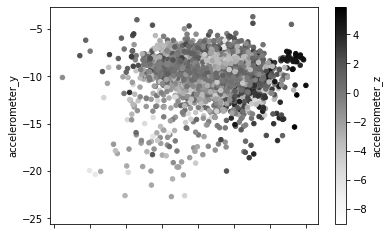

In [27]:
# Geographical inspection (X and Y is coordinates in the park)
data.plot(kind = 'scatter', x = 'accelerometer_x', y = 'accelerometer_y',
                c = 'accelerometer_z')
plt.show()

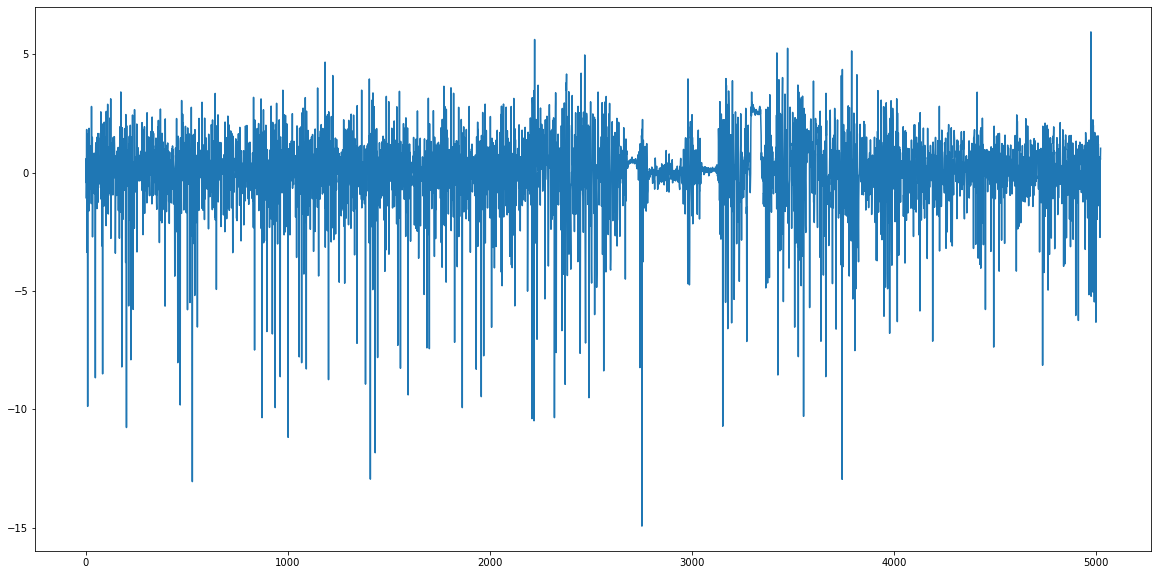

In [28]:
# Inpsect one variable
x = data[["accelerometer_y"]]
x = x - x.mean()

plt.figure(figsize=(20,10))
plt.plot(x)

(array([378., 556., 465., 503., 323., 370., 823., 822., 410., 372.]),
 array([  0.   ,  35.985,  71.97 , 107.955, 143.94 , 179.925, 215.91 ,
        251.895, 287.88 , 323.865, 359.85 ]),
 <a list of 10 Patch objects>)

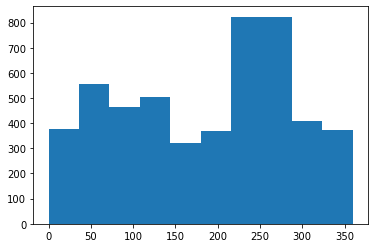

In [29]:
# Histogram of yet another variable
plt.hist(data['orientation_z'])

*Comment*: Blablabl

## Task 6:

Normalize your dowloaded data sets. 

### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [30]:
train_y = train_dataset['MPG']
train_dataset = train_dataset.drop('MPG', axis = 1)
test_y = test_dataset['MPG']
test_dataset = test_dataset.drop('MPG', axis = 1)

In [31]:
train_dataset.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
65,8,351.0,153.0,4129.0,13.0,72,0,0,1
132,4,140.0,75.0,2542.0,17.0,74,0,0,1
74,8,302.0,140.0,4294.0,16.0,72,0,0,1
78,4,120.0,87.0,2979.0,19.5,72,1,0,0
37,6,232.0,100.0,3288.0,15.5,71,0,0,1


### Normalize the data

Look again at the `train_stats` block above and note how different the ranges of each feature are.

It is good practice to normalize features that use different scales and ranges. Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [32]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [33]:
normed_train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
65,1.528471,1.521380,1.275177,1.379315,-0.928344,-1.065117,-0.441445,-0.491351,0.746369
132,-0.848320,-0.511125,-0.757742,-0.499348,0.502127,-0.525344,-0.441445,-0.491351,0.746369
74,1.528471,1.049377,0.936357,1.574639,0.144509,-1.065117,-0.441445,-0.491351,0.746369
78,-0.848320,-0.703780,-0.444986,0.017965,1.396171,-1.065117,2.258163,-0.491351,-1.335607
37,0.340075,0.375086,-0.106166,0.383754,-0.034300,-1.335003,-0.441445,-0.491351,0.746369
...,...,...,...,...,...,...,...,...,...
207,-0.848320,-0.607453,-0.054040,0.220392,0.037224,0.014428,2.258163,-0.491351,-1.335607
279,-0.848320,-0.915700,-0.940184,-0.981147,0.359080,0.554200,-0.441445,2.028805,-1.335607
227,0.340075,0.307657,-0.106166,0.788608,0.752459,0.284314,-0.441445,-0.491351,0.746369
148,-0.848320,-0.742311,-0.757742,-0.849747,-0.570726,-0.525344,2.258163,-0.491351,-1.335607


This normalized data is what we will use to train the model.

Caution: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model. 

## Project 2:  The model building for regression

### Build the regression model

Let's build our model. Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [34]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [35]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


You can read about the implementation of sequential neural networks on Keras: https://keras.io/getting-started/sequential-model-guide/

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________



Now try out the model. Take a batch of `10` examples from the training data and call `model.predict` on it.

In [37]:
# Just something I need to set up to make fitting work without kernel dying
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [38]:
normed_train_data[:10]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
65,1.528471,1.521380,1.275177,1.379315,-0.928344,-1.065117,-0.441445,-0.491351,0.746369
132,-0.848320,-0.511125,-0.757742,-0.499348,0.502127,-0.525344,-0.441445,-0.491351,0.746369
74,1.528471,1.049377,0.936357,1.574639,0.144509,-1.065117,-0.441445,-0.491351,0.746369
78,-0.848320,-0.703780,-0.444986,0.017965,1.396171,-1.065117,2.258163,-0.491351,-1.335607
37,0.340075,0.375086,-0.106166,0.383754,-0.034300,-1.335003,-0.441445,-0.491351,0.746369
54,-0.848320,-1.166151,-0.914121,-1.599082,0.859744,-1.335003,-0.441445,2.028805,-1.335607
294,-0.848320,-1.031293,-1.018373,-1.170552,-0.141585,0.824086,-0.441445,2.028805,-1.335607
60,-0.848320,-0.511125,-0.366796,-0.657975,1.396171,-1.065117,-0.441445,-0.491351,0.746369
12,1.528471,1.993384,1.196987,0.943683,-2.180006,-1.604889,-0.441445,-0.491351,0.746369
341,0.340075,-0.193245,0.154465,-0.282716,-1.071391,1.363859,-0.441445,-0.491351,0.746369


In [39]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.22041127],
       [-0.2901529 ],
       [-0.17166679],
       [-0.49090043],
       [-0.2440067 ],
       [-0.46094036],
       [-0.14383863],
       [-0.43953162],
       [-0.35658938],
       [ 0.06597693]], dtype=float32)

It seems to be working, and it produces a result of the expected shape and type.

### Train the model

Train the model for 1000 epochs, and record the training and validation accuracy in the `history` object.

In [42]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualize the model's training progress using the stats stored in the `history` object.

In [43]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.344790,0.980679,2.344790,8.224373,1.987957,8.224373,995
996,2.122631,0.939342,2.122631,8.342829,1.977836,8.342829,996
997,2.316497,1.004057,2.316497,8.875094,2.044292,8.875094,997
998,2.175707,0.942235,2.175707,8.268903,1.994493,8.268904,998
999,2.090467,0.909817,2.090466,8.690106,2.009917,8.690106,999


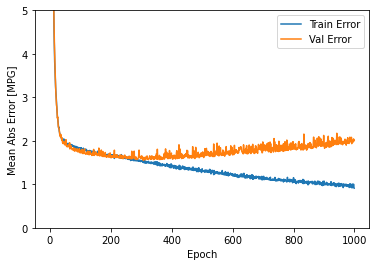

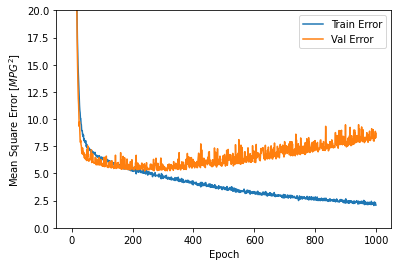

In [44]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

*Comment*: I find it quite interesting that the validaiton error acutally goes up after a a little less than 200 epochs. I'm guessing that it's an effect of the overfitting that starts to occur after a while. 

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve. We'll use an *EarlyStopping callback* that tests a training condition for  every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

You can learn more about this callback [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping).


...................................................................................

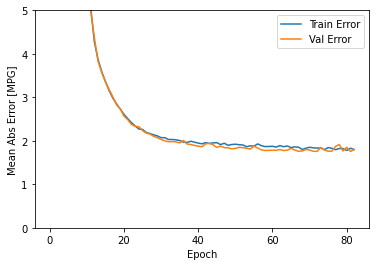

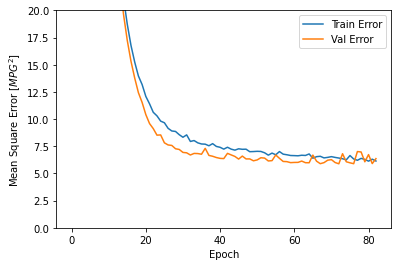

In [47]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_y, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

The graph shows that on the validation set, the average error is usually around +/- 2 MPG. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.  This tells us how well we can expect the model to predict when we use it in the real world.

In [49]:
loss, mae, mse = model.evaluate(normed_test_data, test_y, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

80/80 - 0s - loss: 7.1725 - mean_absolute_error: 2.0878 - mean_squared_error: 7.1725
Testing set Mean Abs Error:  2.09 MPG


### Make predictions

Finally, predict MPG values using data in the testing set:

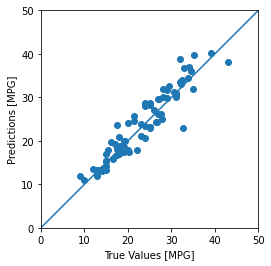

In [51]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_y, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


It looks like our model predicts reasonably well. Let's take a look at the error distribution.

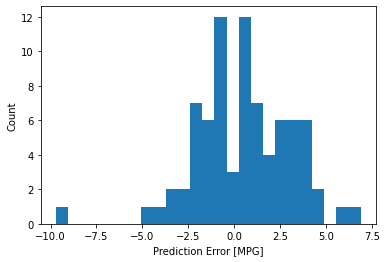

In [52]:
error = test_predictions - test_y
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

It's not quite gaussian, but we might expect that because the number of samples is very small.

## Task 1: 

Using the standard linear regression model and fit it into the same data set. Compare performance of the linear model with the one build on the neural network. 

In [78]:
test = pd.DataFrame([1] * 5)
test

,0
0,1
1,1
2,1
3,1
4,1


In [53]:
import numpy as np

In [88]:
# Define function for building model, which returns a function to predict y
def build_reg_model(x, y):
    X = np.array(pd.concat(pd.DataFrame([1] * len(x)), x, axis = 1))
    Y = np.array(y)
    beta_hat = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), Y))
    def predict_reg(x):
        return np.matmul(X, beta_hat)
    return predict_reg()

In [288]:
# Multiple linear regression class (https://docs.python.org/3/tutorial/classes.html)

class MultipleLinearRegression:
    def __init__(self):
        self.model_name = 'Multiple Linear Regression'
    
    def fit(self, x, y):
        X = np.array(pd.concat([pd.DataFrame([1] * len(x)), x], axis = 1))
        Y = np.array(y)
        self.beta_hat = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
    
    def predict(self, x):
        X = np.array(x)
        return np.matmul(X, self.beta_hat)


In [304]:
pd.concat([pd.DataFrame([1] * len(normed_train_data)), normed_train_data], axis = 1)

,0,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,1.0,1.528471,1.097540,0.675726,0.639451,-1.285962,-1.604889,-0.441445,-0.491351,0.746369
1,1.0,1.528471,1.511748,1.587933,0.863186,-1.464771,-1.604889,-0.441445,-0.491351,0.746369
2,1.0,1.528471,1.203500,1.196987,0.558954,-1.643579,-1.604889,-0.441445,-0.491351,0.746369
3,1.0,1.528471,1.068642,1.196987,0.555402,-1.285962,-1.604889,-0.441445,-0.491351,0.746369
4,1.0,1.528471,1.049377,0.936357,0.574343,-1.822388,-1.604889,-0.441445,-0.491351,0.746369
...,...,...,...,...,...,...,...,...,...,...
392,NaN,-0.848320,-0.405165,-0.366796,-0.016364,0.609412,1.633745,-0.441445,-0.491351,0.746369
393,NaN,-0.848320,-0.511125,-0.471049,-0.205770,0.001462,1.633745,-0.441445,-0.491351,0.746369
394,NaN,-0.848320,-0.925333,-1.357193,-0.987066,3.220021,1.633745,2.258163,-0.491351,-1.335607
395,NaN,-0.848320,-0.559289,-0.523175,-0.791742,-1.429009,1.633745,-0.441445,-0.491351,0.746369


In [292]:
pd.DataFrame([1] * len(normed_train_data))

,0
0,1
1,1
2,1
3,1
4,1
...,...
313,1
314,1
315,1
316,1


In [293]:
normed_train_data.shape

(318, 9)

In [286]:
reg_model = MultipleLinearRegression()

In [287]:
reg_model.fit(normed_train_data, train_y)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 318 is different from 378)

In [92]:
y_hat = reg_model.predict(normed_test_data)

In [93]:
len(y_hat)

80

In [94]:
np.mean((y_hat - test_y)**2)

540.0758846056162

In [95]:
len(test_y)

80

In [96]:
reg_model.beta_hat

array([-1.6164131 ,  4.55639135, -1.34888938, -6.42032702, -0.01104572,
        3.04895591,  1.25      ,  1.        , -0.25      ])

In [97]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(normed_train_data, train_y)
regr.coef_

array([-0.76991935,  2.53204955, -0.88007189, -5.7364271 , -0.02373914,
        3.00405401,  0.53732599,  0.46256827, -0.79653486])

In [98]:
np.array(normed_train_data).shape

(318, 9)

## Task 2: 

Build another neural network model and do analogous analysis. 

## Task 3:

Perform similar analysis on the additionally downloaded data and draw conclusions. 

In [ ]:
# Guide: https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/ 

In [188]:
data.head()

,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,linear_acc_x,linear_acc_y,linear_acc_z,gravity_x,gravity_y,gravity_z,orientation_z,orientation_x,orientation_y,activity
0,-1.3216,-10.7240,-1.6257,-1.9986,-9.5212,-1.2338,0.5982,-1.1754,-0.5259,-0.5976,0.5758,0.2197,231.44,76.14,121.69,walking
1,-1.6832,-9.0671,-0.1077,-2.0672,-9.3668,-2.0395,0.3844,0.3058,1.9030,-0.3746,0.8250,0.1910,221.81,74.03,129.99,walking
2,0.1053,-10.0967,0.1748,-2.0019,-9.3949,-1.9744,2.1154,-0.7076,2.1687,-0.0765,0.2856,0.1904,219.23,72.77,134.61,walking
3,-4.4055,-7.8412,-3.9745,-1.9914,-9.5179,-1.2706,-2.3831,1.6961,-2.9167,1.1959,-0.2342,0.2154,232.86,76.06,122.54,walking
4,0.4645,-13.0320,-2.5691,-2.3540,-9.5181,-0.1861,1.9804,-3.1620,-1.7700,1.2460,-0.4346,-0.0027,246.24,76.51,108.89,walking


In [189]:
# For simplicity, we are only going to use the accelerometer data
data_acc = data[['accelerometer_x',
                 'accelerometer_y',
                 'accelerometer_z',
                 'activity']]

### Reshape data

In [190]:
# Split data into one batch for each activity
# Also drop the column with the labels
walking_raw = data_acc[data_acc['activity'] == 'walking'].drop('activity', axis = 1)
picking_raw = data_acc[data_acc['activity'] == 'picking'].drop('activity', axis = 1)
vacuum_raw = data_acc[data_acc['activity'] == 'vacuum'].drop('activity', axis = 1)

In [191]:
# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
walking_scaled = scaler.fit_transform(walking_raw)
picking_scaled = scaler.fit_transform(picking_raw)
vacuum_scaled = scaler.fit_transform(vacuum_raw)

In [273]:
# Function for reshaping data

def reshape_data(data):
    
    # Check so that we can divide the data into the new shape
    if (len(data) % 10 != 0):
        rows_to_remove = len(data) % 10
        data = data[:-rows_to_remove]
    
    # Make into numpy array and transpose
    data_t = np.array(data).T
    
    # Reshape into batches with ten observations in each
    data_reshaped = data_t.reshape(10, 3, np.int(len(data)/10))
    
    # get obs back
    data_reshaped_t = data_reshaped.T
    
    # Return the reshaped data
    return data_reshaped_t

In [274]:
# Reshape data
walking = reshape_data(walking_raw)
picking = reshape_data(picking_raw)
vacuum = reshape_data(vacuum_raw)

In [275]:
walking.shape

(218, 3, 10)

In [276]:
# Put data into one big batch
X = np.concatenate((walking, picking, vacuum))

In [277]:
# Create labels
y_walking = [1] * len(walking)
y_picking = [2] * len(picking)
y_vacuum = [3] * len(vacuum)

y = np.concatenate((y_walking, y_picking, y_vacuum), axis = None)

In [278]:
# Check their length so that they seem to match up
print(len(y))
print(len(X))

501
501


In [279]:
data.head(10)

,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,linear_acc_x,linear_acc_y,linear_acc_z,gravity_x,gravity_y,gravity_z,orientation_z,orientation_x,orientation_y,activity
0,-1.3216,-10.7240,-1.6257,-1.9986,-9.5212,-1.2338,0.5982,-1.1754,-0.5259,-0.5976,0.5758,0.2197,231.44,76.14,121.69,walking
1,-1.6832,-9.0671,-0.1077,-2.0672,-9.3668,-2.0395,0.3844,0.3058,1.9030,-0.3746,0.8250,0.1910,221.81,74.03,129.99,walking
2,0.1053,-10.0967,0.1748,-2.0019,-9.3949,-1.9744,2.1154,-0.7076,2.1687,-0.0765,0.2856,0.1904,219.23,72.77,134.61,walking
3,-4.4055,-7.8412,-3.9745,-1.9914,-9.5179,-1.2706,-2.3831,1.6961,-2.9167,1.1959,-0.2342,0.2154,232.86,76.06,122.54,walking
4,0.4645,-13.0320,-2.5691,-2.3540,-9.5181,-0.1861,1.9804,-3.1620,-1.7700,1.2460,-0.4346,-0.0027,246.24,76.51,108.89,walking
5,-1.6784,-8.0328,0.0886,-1.8429,-9.6318,0.0527,0.1645,1.5990,0.0359,0.3627,-0.4578,-0.4407,263.20,79.16,88.36,walking
6,-1.6066,-9.1988,-0.1939,-1.6676,-9.6597,0.2815,0.0611,0.4609,-0.4754,-0.0863,-0.2819,0.2692,270.17,80.37,81.85,walking
7,-0.8667,-10.2307,1.2666,-2.0207,-9.5961,0.0300,1.3240,-0.6753,1.2749,-0.1449,-0.1432,0.2991,263.43,78.26,89.56,walking
8,-5.0615,-19.5421,-2.1860,-1.7855,-9.6277,0.5389,-3.2759,-9.9144,-2.7249,-0.5542,0.4463,-0.3435,264.42,78.34,85.91,walking
9,-0.4310,-8.3704,-0.7350,-1.6917,-9.6594,0.0630,1.1458,0.8078,-0.5083,-0.2891,0.3644,-0.2434,269.47,80.02,82.42,walking


In [281]:
X[0]

array([[ -1.3216,   0.4956,  -1.7933,  -1.5419,  -9.7926, -17.9595,
         -8.3824,  -1.4605,  -2.1668,  -2.2889],
       [ -1.652 ,  -2.0878,   0.8595, -10.724 , -10.9011,  -9.3042,
        -11.0592,  -0.1245,  -0.5794,  -2.696 ],
       [ -0.4884,   0.5411,  -2.7917, -11.6577,  -8.6625, -11.0975,
         -1.6257,  -3.2897,  -0.4022,  -0.8045]])

In [196]:
# Split into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [222]:
# Set up model
model = tf.keras.Sequential([
    tf.keras.layers.Conv3D(64,
                           (2,2,2),
                           padding = 'same',
                           activation = 'relu',
                           input_shape = (10, 10, 10)),
    tf.keras.layers.MaxPooling3D(pool_size=(2,2,2),
                                 strides=None,
                                 padding='valid'),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

ValueError: Input 0 of layer conv3d is incompatible with the layer: expected ndim=5, found ndim=3. Full shape received: [None, 10, 3]

In [215]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [218]:
X_train.shape

(400, 10, 3)

In [219]:
y_train.shape

(400,)

In [221]:
model.fit(X_train, y_train, epochs = 10)

Train on 400 samples
Epoch 1/10


InvalidArgumentError: Incompatible shapes: [32,9] vs. [32]
	 [[{{node metrics_16/acc/Equal}}]]

In [201]:
X_train.shape

(400, 10, 3)

## Grader box: 

In what follows the grader will put the values according the following check list:

* 1 Have all commands included in a raw notebook been evaluated? (0 or 0.5pt)
* 2 Have all commands been experimented with? (0 or 0.5pt)
* 3 Have all experiments been briefly commented? (0 or 0.5pt)
* 4 Have all tasks been attempted? (0, 0.5, or 1pt)
* 5 How many of the tasks have been completed? (0, 0.5, or 1pt)
* 6 How many of the tasks (completed or not) have been commented? (0, 0.5, or 1pt)
* 7 Have been the conclusions from performing the tasks clearly stated? (0, 0.5, or 1pt)
* 8 Have been the overall organization of the submitted Lab notebook been neat and easy to follow by the grader? (0, or 0.5pt) 


#### 1 Have all commands included in a raw notebook been evaluated? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A
#### Grader's comment (if desired): 
N/A

#### 2 Have all commands been experimented with? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A

#### 3 Have all experiments been briefly commented? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A

#### 4 Have all tasks been attempted? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 5 How many of the tasks have been completed? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 6 How many of the tasks (completed or not) have been commented? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 7 Have been the conclusions from performing the tasks clearly stated? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 8 Have been the overall organization of the submitted Lab notebook been neat and easy to follow by the grader? (0, or 0.5pt)

#### Grader's comment (if desired): 
N/A

### Overall score

### Score and grader's comment (if desired): 
N/A